<a href="https://colab.research.google.com/github/shreyasrajesh0308/NNDL-proj/blob/main/LSTM_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LSTM experiments 

# Running experiments on the BCI data with baseline LSTMs.

Model Paper: 

### Load Data 

Load preprocessed data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
X_test = np.load("/content/drive/MyDrive/project_data/X_test.npy")
y_test = np.load("/content/drive/MyDrive/project_data/y_test.npy")
person_train_valid = np.load("/content/drive/MyDrive/project_data/person_train_valid.npy")
X_train_valid = np.load("/content/drive/MyDrive/project_data/X_train_valid.npy")
y_train_valid = np.load("/content/drive/MyDrive/project_data/y_train_valid.npy")
person_test = np.load("/content/drive/MyDrive/project_data/person_test.npy")



In [3]:
def map_classes(y) :

  for i in range(len(y)):

    if y[i] == 769:
      y[i] = 0
    elif y[i] == 770:
      y[i] = 1
    elif y[i] == 771:
      y[i] = 2
    elif y[i] == 772:
      y[i] = 3
    else:
      return None

  return y

In [4]:
y_train_valid = map_classes(y_train_valid)
y_test = map_classes(y_test)

### Indices for subject one training 

In [5]:
train_indeces = [ i for i in range(len(person_train_valid)) if person_train_valid[i]==0]
X_train_subject_1 = X_train_valid[train_indeces]
y_train_subject_1 = y_train_valid[train_indeces]

### Indices for subject one testing 

In [6]:
test_indeces = [ i for i in range(len(person_test)) if person_test[i]==0]
X_test_subject_1 = X_test[test_indeces]
y_test_subject_1 = y_test[test_indeces]

In [7]:
num_classes = len(np.unique(y_train_valid))

In [8]:
X_train_subject_1 = np.swapaxes(X_train_subject_1, 1, 2)
X_test_subject_1 = np.swapaxes(X_test_subject_1, 1, 2)

In [9]:
X_train_subject_1.shape

(237, 1000, 22)

In [10]:
X_test_subject_1.shape

(50, 1000, 22)

In [11]:
y_train_subject_1 = y_train_subject_1.reshape(y_train_subject_1.shape[0], 1)

In [12]:
y_test_subject_1 = y_test_subject_1.reshape(y_test_subject_1.shape[0], 1)

In [13]:
y_train_subject_1.shape

(237, 1)

## Building a baseline with an LSTM model, trained with one subject data

In [24]:
num_classes = len(np.unique(y_train_subject_1))

In [25]:
from tensorflow import keras

In [26]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train_subject_1.shape[1], X_train_subject_1.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [27]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]


In [ ]:
history = model.fit(
    X_train_subject_1,
    y_train_subject_1,
    batch_size=64,
    epochs=150,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/150
3/3 [==============================] - 5s 349ms/step - loss: 0.9855 - sparse_categorical_accuracy: 0.6243 - val_loss: 1.3905 - val_sparse_categorical_accuracy: 0.2500 - lr: 0.0010
Epoch 2/150
3/3 [==============================] - 1s 335ms/step - loss: 0.9388 - sparse_categorical_accuracy: 0.6825 - val_loss: 1.4007 - val_sparse_categorical_accuracy: 0.2500 - lr: 0.0010
Epoch 3/150
3/3 [==============================] - 1s 333ms/step - loss: 0.9731 - sparse_categorical_accuracy: 0.5926 - val_loss: 1.4035 - val_sparse_categorical_accuracy: 0.2500 - lr: 0.0010
Epoch 4/150
3/3 [==============================] - 1s 330ms/step - loss: 0.9481 - sparse_categorical_accuracy: 0.6614 - val_loss: 1.4105 - val_sparse_categorical_accuracy: 0.2292 - lr: 0.0010
Epoch 5/150
3/3 [==============================] - 1s 334ms/step - loss: 0.9481 - sparse_categorical_accuracy: 0.6508 - val_loss: 1.4168 - val_sparse_categorical_accuracy: 0.2500 - lr: 0.0010
Epoch 6/150
3/3 [=======================

In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test_subject_1, y_test_subject_1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 [==============================] - 1s 110ms/step - loss: 1.5403 - sparse_categorical_accuracy: 0.2800
Test accuracy 0.2800000011920929
Test loss 1.5403295755386353


In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
import matplotlib.pyplot as plt

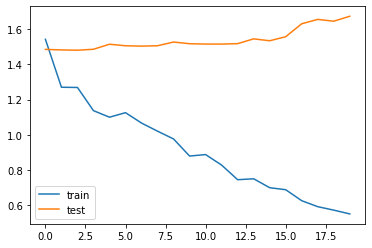

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
model.evaluate(X_test_subject_1, y_test_one_hot)

2/2 [==============================] - 0s 142ms/step - loss: 1.6927 - acc: 0.2200


[1.6926912069320679, 0.2199999988079071]

## Train model on entire data and test on single and entire dataset

In [18]:
X_train = np.swapaxes(X_train_valid, 1, 2)
X_test = np.swapaxes(X_test, 1, 2)

In [28]:
X_train.shape

(2115, 1000, 22)

In [19]:
y_train = y_train_valid.reshape(y_train_valid.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [29]:
history = model.fit(
    X_train,
    y_train_valid,
    batch_size=64,
    epochs=150,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/150
27/27 [==============================] - 21s 510ms/step - loss: 1.4497 - sparse_categorical_accuracy: 0.2494 - val_loss: 1.3878 - val_sparse_categorical_accuracy: 0.2577 - lr: 0.0010
Epoch 2/150
27/27 [==============================] - 13s 474ms/step - loss: 1.3932 - sparse_categorical_accuracy: 0.2772 - val_loss: 1.3892 - val_sparse_categorical_accuracy: 0.2459 - lr: 0.0010
Epoch 3/150
27/27 [==============================] - 13s 473ms/step - loss: 1.3584 - sparse_categorical_accuracy: 0.3286 - val_loss: 1.3883 - val_sparse_categorical_accuracy: 0.2671 - lr: 0.0010
Epoch 4/150
27/27 [==============================] - 13s 478ms/step - loss: 1.3497 - sparse_categorical_accuracy: 0.3304 - val_loss: 1.3893 - val_sparse_categorical_accuracy: 0.2600 - lr: 0.0010
Epoch 5/150
27/27 [==============================] - 13s 474ms/step - loss: 1.3294 - sparse_categorical_accuracy: 0.3670 - val_loss: 1.3937 - val_sparse_categorical_accuracy: 0.2813 - lr: 0.0010
Epoch 6/150
27/27 [======

In [30]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test_subject_1, y_test_subject_1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 [==============================] - 1s 138ms/step - loss: 1.3855 - sparse_categorical_accuracy: 0.2400
Test accuracy 0.23999999463558197
Test loss 1.3855136632919312


In [31]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

14/14 [==============================] - 4s 138ms/step - loss: 1.3989 - sparse_categorical_accuracy: 0.2415
Test accuracy 0.2415349930524826
Test loss 1.3989284038543701


## Model change experiments

In [ ]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=16, 
          input_shape=[X_train_subject_1.shape[1], X_train_subject_1.shape[2]]
      ), 
    keras.layers.LSTM(
          units=16, 
          input_shape=[X_train_subject_1.shape[1], X_train_subject_1.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]


In [ ]:
history = model.fit(
    X_train_subject_1,
    y_train_subject_1,
    batch_size=64,
    epochs=150,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/150
3/3 [==============================] - 6s 794ms/step - loss: 1.5174 - sparse_categorical_accuracy: 0.2487 - val_loss: 1.4634 - val_sparse_categorical_accuracy: 0.1667 - lr: 0.0010
Epoch 2/150
3/3 [==============================] - 1s 328ms/step - loss: 1.5097 - sparse_categorical_accuracy: 0.2698 - val_loss: 1.4520 - val_sparse_categorical_accuracy: 0.1667 - lr: 0.0010
Epoch 3/150
3/3 [==============================] - 1s 330ms/step - loss: 1.4159 - sparse_categorical_accuracy: 0.2910 - val_loss: 1.4431 - val_sparse_categorical_accuracy: 0.1875 - lr: 0.0010
Epoch 4/150
3/3 [==============================] - 1s 333ms/step - loss: 1.3892 - sparse_categorical_accuracy: 0.3175 - val_loss: 1.4385 - val_sparse_categorical_accuracy: 0.2083 - lr: 0.0010
Epoch 5/150
3/3 [==============================] - 1s 332ms/step - loss: 1.3986 - sparse_categorical_accuracy: 0.3228 - val_loss: 1.4361 - val_sparse_categorical_accuracy: 0.2292 - lr: 0.0010
Epoch 6/150
3/3 [=======================

In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test_subject_1, y_test_subject_1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 [==============================] - 1s 107ms/step - loss: 1.4304 - sparse_categorical_accuracy: 0.2200
Test accuracy 0.2199999988079071
Test loss 1.4303545951843262
